In [1]:
import numpy as np
import pandas as pd
import altair as alt
import os as os
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
os.getcwd()

'/home/dkruszew/Documents/labs/DSCI-532-Group108/scr'

In [2]:
df = pd.read_csv('../data/crimedata_csv_all_years.csv')

In [9]:
df['DATE'] = pd.to_datetime({'year':df['YEAR'],
                            'month':df['MONTH'],
                            'day':df['DAY'],
                            'hour':df['HOUR']})

In [32]:
dofw = pd.DataFrame({'day_of_week': ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                    'day_index': [1,2,3,4,5,6,7]})
dofw.head()

,day_of_week,day_index
0,Monday,1
1,Tuesday,2
2,Wednesday,3
3,Thursday,4
4,Friday,5


In [16]:
df['day_of_week'] = pd.DatetimeIndex(df['DATE']).day_name()

In [35]:
df = pd.merge(df, dofw, how="left", on="day_of_week")
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,DATE,day_of_week,day_index
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06,2012-12-14 08:00:00,Friday,5
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06,2019-03-07 02:00:00,Thursday,4
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06,2019-08-27 04:00:00,Tuesday,2
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06,2014-08-08 05:00:00,Friday,5
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06,2005-11-14 03:00:00,Monday,1


In [5]:
df.query('TYPE == "Homicide"')

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
105073,Homicide,2018,12,22,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105074,Homicide,2017,2,1,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105075,Homicide,2004,1,6,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105076,Homicide,2017,10,13,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105077,Homicide,2003,8,27,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
105320,Homicide,2019,6,25,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105321,Homicide,2003,11,28,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105322,Homicide,2011,12,30,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
105323,Homicide,2015,3,3,0,0,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0


In [12]:
(df.groupby(['TYPE', 'NEIGHBOURHOOD']).count()/df.groupby(['TYPE']).count())[['DAY']].max()

DAY    0.37681
dtype: float64

In [14]:
df.groupby(['TYPE']).count()

,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
TYPE,,,,,,,,,
Break and Enter Commercial,38807,38807,38807,38807,38807,38806,38804,38807,38807
Break and Enter Residential/Other,66266,66266,66266,66266,66266,66263,66263,66266,66266
Homicide,252,252,252,252,252,252,0,252,252
Mischief,83714,83714,83714,83714,83714,83711,83414,83714,83714
Offence Against a Person,61931,61931,61931,61931,61931,61931,0,61931,61931
Other Theft,64364,64364,64364,64364,64364,64361,64359,64364,64364
Theft from Vehicle,208877,208877,208877,208877,208877,208875,206909,208877,208877
Theft of Bicycle,31016,31016,31016,31016,31016,31016,30883,31016,31016
Theft of Vehicle,41462,41462,41462,41462,41462,41461,41384,41462,41462


In [15]:
df.query('NEIGHBOURHOOD == "Central Business District"').groupby(['TYPE']).count()

,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
TYPE,,,,,,,,,
Break and Enter Commercial,10770,10770,10770,10770,10770,10770,10770,10770,10770
Break and Enter Residential/Other,3823,3823,3823,3823,3823,3823,3823,3823,3823
Mischief,20787,20787,20787,20787,20787,20786,20787,20787,20787
Other Theft,24253,24253,24253,24253,24253,24252,24253,24253,24253
Theft from Vehicle,60719,60719,60719,60719,60719,60719,60719,60719,60719
Theft of Bicycle,8434,8434,8434,8434,8434,8434,8434,8434,8434
Theft of Vehicle,4400,4400,4400,4400,4400,4400,4400,4400,4400
Vehicle Collision or Pedestrian Struck (with Fatality),45,45,45,45,45,45,45,45,45
Vehicle Collision or Pedestrian Struck (with Injury),3700,3700,3700,3700,3700,3700,3700,3700,3700


In [7]:
df_line = df.query('TYPE == "Break and Enter Commercial"').groupby(['YEAR']).count().reset_index()

In [8]:
df_line.head()

,YEAR,TYPE,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,2003,3197,3197,3197,3197,3197,3197,3197,3197,3197
1,2004,3283,3283,3283,3283,3283,3283,3283,3283,3283
2,2005,2639,2639,2639,2639,2639,2639,2638,2639,2639
3,2006,2844,2844,2844,2844,2844,2844,2844,2844,2844
4,2007,2436,2436,2436,2436,2436,2436,2434,2436,2436


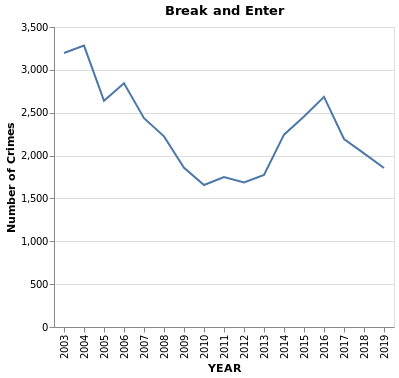

In [9]:
alt.Chart(df_line).mark_line().encode(
    alt.X('YEAR:O'),
    alt.Y('TYPE:Q', title='Number of Crimes')
).properties(
title='Break and Enter')

In [39]:
(pd.DataFrame({'district':df['NEIGHBOURHOOD'].unique()})).sort_values('district').reset_index()

,index,district
0,18,Arbutus Ridge
1,3,Central Business District
2,21,Dunbar-Southlands
3,1,Fairview
4,6,Grandview-Woodland
5,4,Hastings-Sunrise
6,8,Kensington-Cedar Cottage
7,16,Kerrisdale
8,20,Killarney
9,7,Kitsilano


In [178]:
df = pd.read_csv('../data/crimedata_csv_all_years.csv')

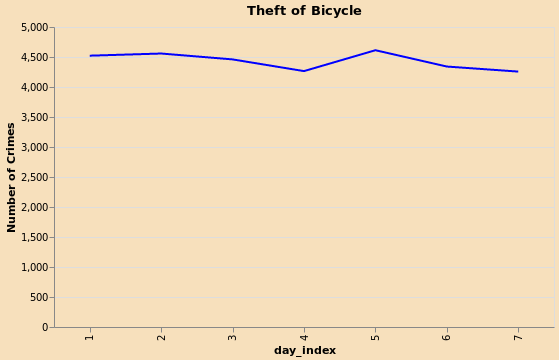

In [37]:
time_scale = "day_index"
crime = "Theft of Bicycle"
neighbourhood = "ALL"

if neighbourhood != "ALL":
    if crime != "ALL":
        df_line = df.query('TYPE == @crime & NEIGHBOURHOOD == @neighbourhood').groupby([time_scale]).count().reset_index()
    else:    
        df_line = df.query('NEIGHBOURHOOD == @neighbourhood').groupby([time_scale]).count().reset_index()
else:
    if crime != "ALL":
        df_line = df.query('TYPE == @crime').groupby([time_scale]).count().reset_index()
    else:
        df_line = df.groupby([time_scale]).count().reset_index() 
    
alt.Chart(df_line).mark_line().encode(
    alt.X(time_scale+':N'),
    alt.Y('TYPE:Q', title='Number of Crimes'),
    alt.Color(value="blue")
).configure_axisX(
    labelAngle=90,
    grid=True
).configure(
    background='#f7e0bc' #HEX color code
).properties(
height=300,
width=500,
title=crime
)

In [112]:
df['TYPE'].unique()

array(['Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft',
       'Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)'],
      dtype=object)